# 1) IMPORT
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction#Baseline

In [1]:
import pandas as pd
import numpy as np
#########IMPORT
data_train = pd.read_csv('input/Projet/application_train.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
data_test = pd.read_csv('input/Projet/application_test.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
# credits précedents reliés au credit actuel
data_bur = pd.read_csv('input/Projet/bureau.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
# balance par mois sur les credits en statut

data_burbal = pd.read_csv('input/Projet/bureau_balance.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
#precedents home credit reliés
data_cardbal = pd.read_csv('input/Projet/credit_card_balance.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
data_cashbal = pd.read_csv('input/Projet/POS_CASH_balance.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
data_pay = pd.read_csv('input/Projet/installments_payments.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
data_prevap = pd.read_csv('input/Projet/previous_application.csv', delimiter = ',',error_bad_lines=False,low_memory=False)
##############
#?
data_sub=pd.read_csv('input/Projet/sample_submission.csv', delimiter = ',',error_bad_lines=False,low_memory=False)

print('le fichier train contient ','\033[1m',data_train.shape[0],'lignes','\033[0m',' et ','\033[1m',data_train.shape[1],'colonnes','\033[0m')
print('le fichier test contient ','\033[1m',data_test.shape[0],'lignes','\033[0m',' et ','\033[1m',data_test.shape[1],'colonnes','\033[0m')
print('le fichier bur contient ','\033[1m',data_bur.shape[0],'lignes','\033[0m',' et ','\033[1m',data_bur.shape[1],'colonnes','\033[0m')
print('le fichier burbal contient ','\033[1m',data_burbal.shape[0],'lignes','\033[0m',' et ','\033[1m',data_burbal.shape[1],'colonnes','\033[0m')
print('le fichier cardbal contient ','\033[1m',data_cardbal.shape[0],'lignes','\033[0m',' et ','\033[1m',data_cardbal.shape[1],'colonnes','\033[0m')
print('le fichier cashbal contient ','\033[1m',data_cashbal.shape[0],'lignes','\033[0m',' et ','\033[1m',data_cashbal.shape[1],'colonnes','\033[0m')
print('le fichier pay contient ','\033[1m',data_pay.shape[0],'lignes','\033[0m',' et ','\033[1m',data_pay.shape[1],'colonnes','\033[0m')
print('le fichier prevap contient ','\033[1m',data_prevap.shape[0],'lignes','\033[0m',' et ','\033[1m',data_prevap.shape[1],'colonnes','\033[0m')
print('le fichier sub contient ','\033[1m',data_sub.shape[0],'lignes','\033[0m',' et ','\033[1m',data_sub.shape[1],'colonnes','\033[0m')


le fichier train contient   307511 lignes   et   122 colonnes 
le fichier test contient   48744 lignes   et   121 colonnes 
le fichier bur contient   1716428 lignes   et   17 colonnes 
le fichier burbal contient   27299925 lignes   et   3 colonnes 
le fichier cardbal contient   3840312 lignes   et   23 colonnes 
le fichier cashbal contient   10001358 lignes   et   8 colonnes 
le fichier pay contient   13605401 lignes   et   8 colonnes 
le fichier prevap contient   1670214 lignes   et   37 colonnes 
le fichier sub contient   48744 lignes   et   2 colonnes 


In [3]:
data=data_train#.append(data_test)

### *verif doublons*
* FACULTATIF: pas de doublons

In [ ]:
def doublonrem(datain,datanam,keynam):
    temp=datain.copy()
    temp2=temp.drop_duplicates(subset =keynam, keep = 'last', inplace=False)
    #inplace -> renvoie une table filtrée ou modifie directement la table de base sans rien renvoyer
    print('extraction de ', temp2.shape[0]-datain.shape[0],'doublons de la table ',datanam,' basée sur la variable ',keynam)
    return temp2

data2=doublonrem(data,'totale','SK_ID_CURR')

data_bur2 = doublonrem(data_bur,'bur',['SK_ID_CURR','SK_ID_BUREAU'])
data_burbal2 = doublonrem(data_burbal,'burbal',['SK_ID_BUREAU','MONTHS_BALANCE'])
data_cardbal2 = doublonrem(data_cardbal,'cardbal',['SK_ID_PREV','SK_ID_CURR','MONTHS_BALANCE'])
data_cashbal2 = doublonrem(data_cashbal,'cashbal',['SK_ID_PREV','SK_ID_CURR','MONTHS_BALANCE'])
#fichier de payment un peu sioux: necessite toutes les colonne spour les doublons check
data_pay2 = doublonrem(data_pay,'pay',data_pay.columns.tolist())
data_prevap2 = doublonrem(data_prevap,'prevap',['SK_ID_PREV','SK_ID_CURR'])


# 2) EXPLORATION
## TRAIN:
* Un certain nombre de champs peu à moyennement renseignés
    * les suffixes mod /med /avg : informations normalisés sur les constructions ou vivent les demandeurs
    * l'age de la voiture , champs qui necessite d'en posseder une pour en avoir une
        * 2/3 n'ont pas de voitures
        * 1/3 ont donné l age de la voiture, ca correspond
    * on ne connait pas la profession d'1/3 des demandeurs
* la proportion de remplissage des champs semblent identiques que le TARGET soit à 0 ou 1
* on peut donc dans un premier temps oublier un certain nombre de colonnes

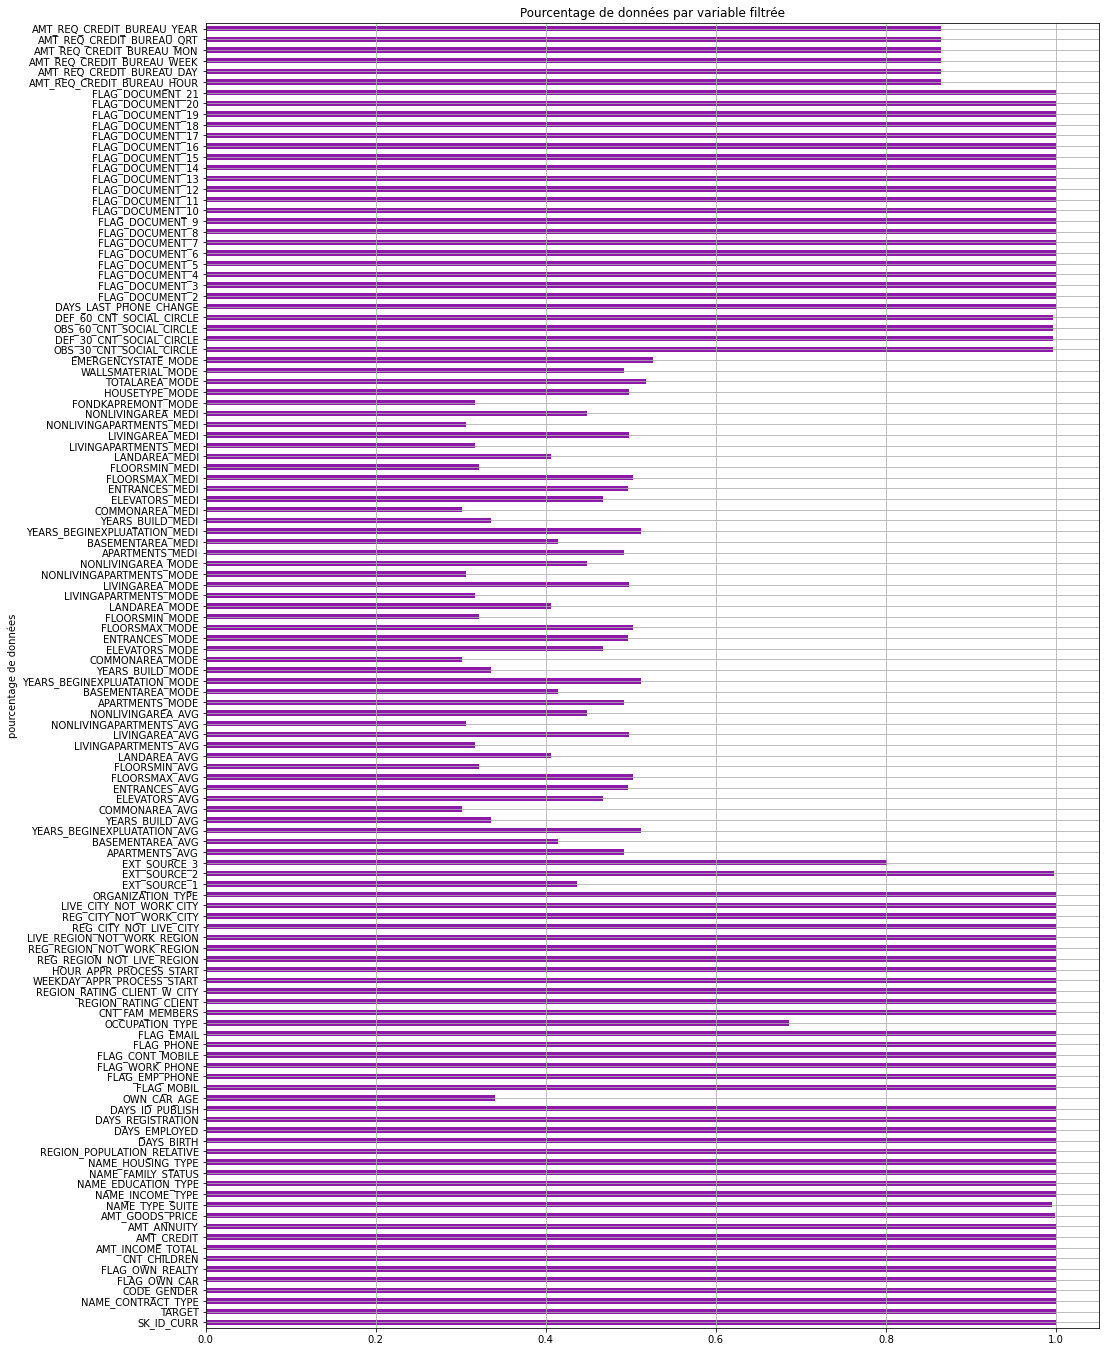

In [4]:
import matplotlib.pyplot as plt

datanull0=1-(data.isnull().sum()/data.shape[0])
plt.figure(figsize=(16,24))
ax = datanull0.plot.barh( color="#8d19a9",title='Pourcentage de données par variable filtrée', xlabel='pourcentage de données')
ax.grid(zorder=0)
plt.show()

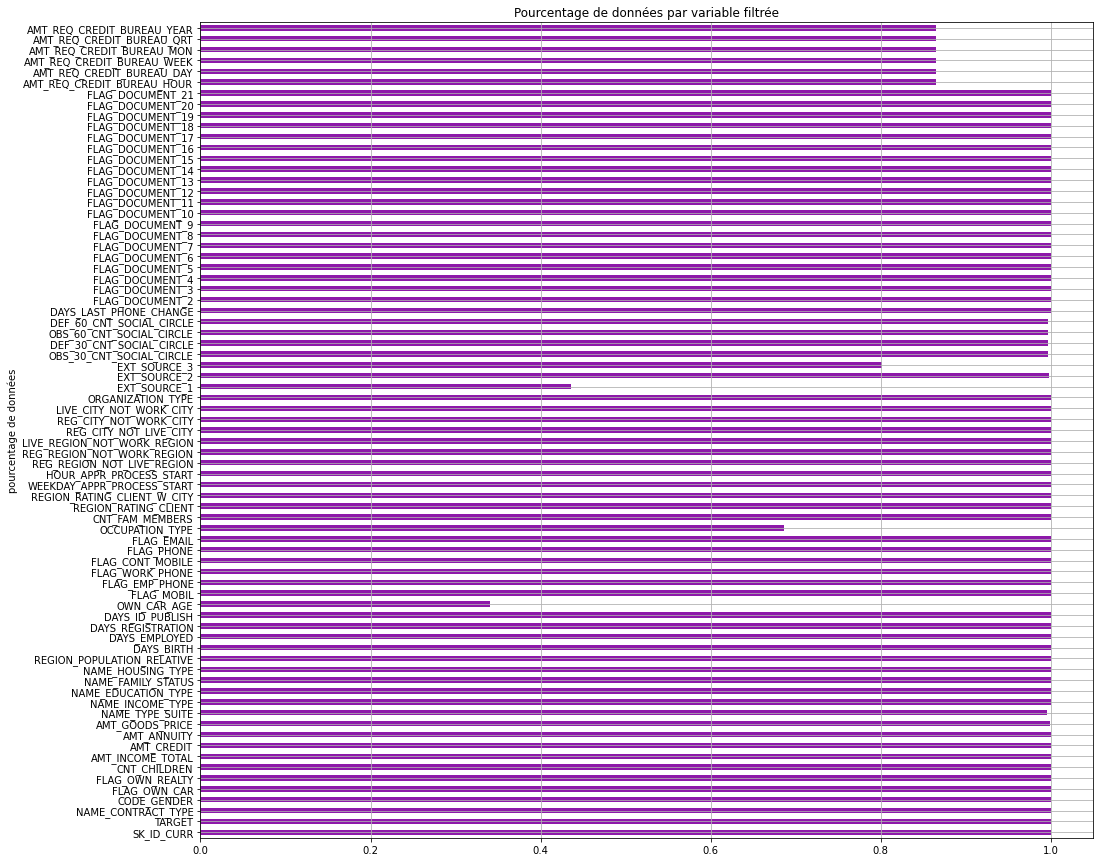

In [5]:
###################################################################
#on enleve les mode - medi - avg
lismedi=data.filter(regex='_MEDI',axis=1).columns.tolist()
lisavg=data.filter(regex='_AVG',axis=1).columns.tolist()
lismode=data.filter(regex='_MODE',axis=1).columns.tolist()
listorem=lismedi+lismode+lisavg

data=data.drop(columns=listorem)

#lisvar=data_train.columns.tolist()
#for elem in listorem:
#    lisvar.remove(elem)

datanull1=1-(data.isnull().sum()/data.shape[0])
plt.figure(figsize=(16,15))
ax = datanull1.plot.barh( color="#8d19a9",title='Pourcentage de données par variable filtrée', xlabel='pourcentage de données')
ax.grid(zorder=0)
plt.show()

## 2) a) Nettoyage données numeriques

In [6]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
display(data.dtypes.sort_values())
statdes=data.describe()
display(statdes)
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 10)

SK_ID_CURR                       int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
FLAG_DOCUMENT_2                  int64
FLAG_DOCUMENT_3                  int64
FLAG_DOCUMENT_4                  int64
FLAG_DOCUMENT_5                  int64
FLAG_DOCUMENT_6                  int64
FLAG_DOCUMENT_7                  int64
REGION_RATING_CLIENT_W_CITY      int64
FLAG_DOCUMENT_8                  int64
FLAG_DOCUMENT_10                 int64
FLAG_DOCUMENT_11                 int64
FLAG_DOCUMENT_12                 int64
FLAG_DOCUMENT_13                 int64
FLAG_DOCUMENT_14                 int64
FLAG_DOCUMENT_15                 int64
FLAG_DOCUMENT_16                 int64
FLAG_DOCUMENT_17                 int64
FLAG_DOCUMENT_18                 int64
FLAG_DOCUMENT_19                 int64
FLAG_DOCUMENT_20         

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.00000

In [7]:
data2=data.copy()
###############################################
#on passe en année les jours
data2['Y_BIRTH']=-data2['DAYS_BIRTH']/365.25
data2['Y_EMPLOYED']=-data2['DAYS_EMPLOYED']/365.25
data2['Y_REGISTRATION']=-data2['DAYS_REGISTRATION']/365.25
data2['Y_ID_PUBLISH']=-data2['DAYS_ID_PUBLISH']/365.25
data2['Y_LAST_PHONE_CHANGE']=-data2['DAYS_LAST_PHONE_CHANGE']/365.25


#on garde les duréees cohérentes et positives
nbrow=data2.shape[0]
data2=data2.loc[data2['Y_BIRTH']>=18,:]
print(nbrow-data2.shape[0],' lignes supprimées pour Y_BIRTH>18')
nbrow=data2.shape[0]
data2=data2.loc[data2['Y_EMPLOYED']>=0,:]
print(nbrow-data2.shape[0],' lignes supprimées pour Y_EMPLOYED>0')
nbrow=data2.shape[0]
data2=data2.loc[data2['Y_REGISTRATION']>=0,:]
print(nbrow-data2.shape[0],' lignes supprimées pour Y_REGISTRATION>0')
nbrow=data2.shape[0]
data2=data2.loc[data2['Y_ID_PUBLISH']>=0,:]
print(nbrow-data2.shape[0],' lignes supprimées pour Y_ID_PUBLISH>0')
nbrow=data2.shape[0]
data2=data2.loc[data2['Y_ID_PUBLISH']>=0,:]
print(nbrow-data2.shape[0],' lignes supprimées pour Y_ID_PUBLISH>0')
nbrow=data2.shape[0]
data2=data2.loc[data2['Y_LAST_PHONE_CHANGE']>=0,:]
print(nbrow-data2.shape[0],' lignes supprimées pour Y_LAST_PHONE_CHANGE>0')

#bon sens

nbrow=data2.shape[0]
data2=data2.loc[(data2.Y_BIRTH>data2.Y_EMPLOYED+16),:]
print(nbrow-data2.shape[0],"lignes supprimées pour cause d'age > duree d emploi + 16 ans")
nbrow=data2.shape[0]
data2=data2.loc[(data2.Y_BIRTH>data2.Y_REGISTRATION),:]
print(nbrow-data2.shape[0],"lignes supprimées pour cause d'age > registration")
nbrow=data2.shape[0]
data2=data2.loc[(data2.Y_BIRTH>data2.Y_ID_PUBLISH),:]
print(nbrow-data2.shape[0],"lignes supprimées pour cause d'age > id publish")
###############################################
#bon sens sur les credits
nbrow=data2.shape[0]
data2=data2.loc[(data2.AMT_CREDIT>=data2.AMT_ANNUITY),:]
#le credit peut etre superieur au prix du bien , travaux oblige
#data2=data2.loc[(data2.AMT_GOODS_PRICE>=data2.AMT_CREDIT),:]
print(nbrow-data2.shape[0],"lignes supprimées pour cause d'annuité > credit")
###############################################

def light_iqr_up(data2in,statin,varin,seuilman,seuil=0):
    #attention le seuil est calculé avant pour ne pas etre sensible à la reduction du nombre d'obs des variables precedentes
    nbrow=data2in.shape[0]
    cutup=statin.loc['50%',varin]+1.5*(statin.loc['75%',varin]-statin.loc['25%',varin])
    if seuilman==False:
        data2out=data2in.loc[(data2in[varin]<cutup),:]
        print(nbrow-data2out.shape[0],' lignes supprimées sur iqr ',varin,' -> il reste ',data2out.shape[0],' lignes')
    elif seuilman==True:
        data2out=data2in.loc[(data2in[varin]<seuil),:]
        print(nbrow-data2out.shape[0],' lignes supprimées sur seuil ',varin,' -> il reste ',data2out.shape[0],' lignes')
    return data2out

#data2=light_iqr_up(data2,statdes,'CNT_CHILDREN',seuilman=True,seuil=10)# on met un seuil arbitraire à 10 enfants mais bon pas d'uen grande utilité
data2=light_iqr_up(data2,statdes,'AMT_INCOME_TOTAL',seuilman=True,seuil=1E6)#seuil manuel à 1 million
#data2=light_iqr_up(data2,statdes,'AMT_CREDIT',seuilman=False)
#data2=light_iqr_up(data2,statdes,'AMT_ANNUITY',seuilman=False)
#data2=light_iqr_up(data2,statdes,'AMT_GOODS_PRICE',seuilman=False)
#data2=light_iqr_up(data2,statdes,'REGION_POPULATION_RELATIVE',seuilman=False)

#attention sur les voitures l'age semble avoir un impact mais attention aux voitures de collections
#features engineering a faire
#data2=light_iqr_up(data2,statdes,'OWN_CAR_AGE',seuilman=True,seuil=75)
#data2=light_iqr_up(data2,statdes,'CNT_FAM_MEMBERS',seuilman=True,seuil=11) # on met un seuil arbitraire à 11
#data2=light_iqr_up(data2,statdes,'OBS_30_CNT_SOCIAL_CIRCLE',seuilman=True,seuil=40) # on met un seuil arbitraire
#data2=light_iqr_up(data2,statdes,'OBS_60_CNT_SOCIAL_CIRCLE',seuilman=True,seuil=40)
#data2=light_iqr_up(data2,statdes,'AMT_REQ_CREDIT_BUREAU_QRT',seuilman=True,seuil=40)

data2=data2.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'])
statdes2=data2.describe()
pd.set_option('max_columns', None)
display(statdes2)
pd.set_option('max_columns', 10)

0  lignes supprimées pour Y_BIRTH>18
55374  lignes supprimées pour Y_EMPLOYED>0
0  lignes supprimées pour Y_REGISTRATION>0
0  lignes supprimées pour Y_ID_PUBLISH>0
0  lignes supprimées pour Y_ID_PUBLISH>0
1  lignes supprimées pour Y_LAST_PHONE_CHANGE>0
0 lignes supprimées pour cause d'age > duree d emploi + 16 ans
894 lignes supprimées pour cause d'age > registration
0 lignes supprimées pour cause d'age > id publish
12 lignes supprimées pour cause d'annuité > credit
240  lignes supprimées sur seuil  AMT_INCOME_TOTAL  -> il reste  250990  lignes


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Y_BIRTH,Y_EMPLOYED,Y_REGISTRATION,Y_ID_PUBLISH,Y_LAST_PHONE_CHANGE
count,250990.000000,250990.000000,250990.000000,250990.000000,2.509900e+05,250990.000000,2.507360e+05,250990.000000,93967.000000,250990.0,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250988.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,120666.000000,2.504910e+05,201416.000000,250149.000000,250149.000000,250149.000000,250149.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000,217381.000000,217381.000000,217381.000000,217381.000000,217381.000000,217381.000000,250990.000000,250990.000000,250990.000000,250990.000000,250990.000000
mean,278096.445974,0.086565,0.498996,174112.855371,6.114722e+05,27798.662865,5.494187e+05,0.020897,11.954580,1.0,0.999952,0.243057,0.997900,0.277784,0.063377,2.253590,2.044974,2.023638,12.200649,0.017156,0.061716,0.049456,0.089195,0.280310,0.218682,0.482456,5.163143e-01,0.500607,1.416080,0.140013,1.399014,0.097674,0.000052,0.763485,0.000080,0.016240,0.008698,0.000203,0.096964,0.004590,0.000024,0.004757,0.000008,0.004219,0.003510,0.001442,0.011929,0.000319,0.009785,0.000713,0.000606,0.000406,0.006574,0.006960,0.034078,0.282325,0.259807,1.857297,40.483066,6.538725,12.642340,7.678404,2.662290
std,102817.555954,0.281197,0.763619,91317.137490,4.060247e+05,14553.750633,3.727069e+05,0.013867,11.975593,0.0,0.006914,0.428930,0.045774,0.447907,0.243640,0.942052,0.512409,0.506459,3.299961,0.129853,0.240639,0.216819,0.285025,0.449152,0.413353,0.205367,1.898190e-01,0.195981,2.400845,0.442182,2.379325,0.358293,0.007197,0.424943,0.008926,0.126396,0.092854,0.014253,0.295909,0.067593,0.004889,0.068808,0.002823,0.064819,0.059142,0.037950,0.108566,0.017850,0.098435,0.026696,0.024602,0.020155,0.085028,0.110379,0.202836,0.949147,0.824536,1.826513,10.008613,6.407845,8.873664,4.148214,2.266209
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1980.000000,4.050000e+04,0.000290,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.503765,0.000000,-0.000000,0.000000,-0.000000
25%,188999.250000,0.000000,0.000000,112500.000000,2.779695e+05,17077.500000,2.475000e+05,0.010006,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000

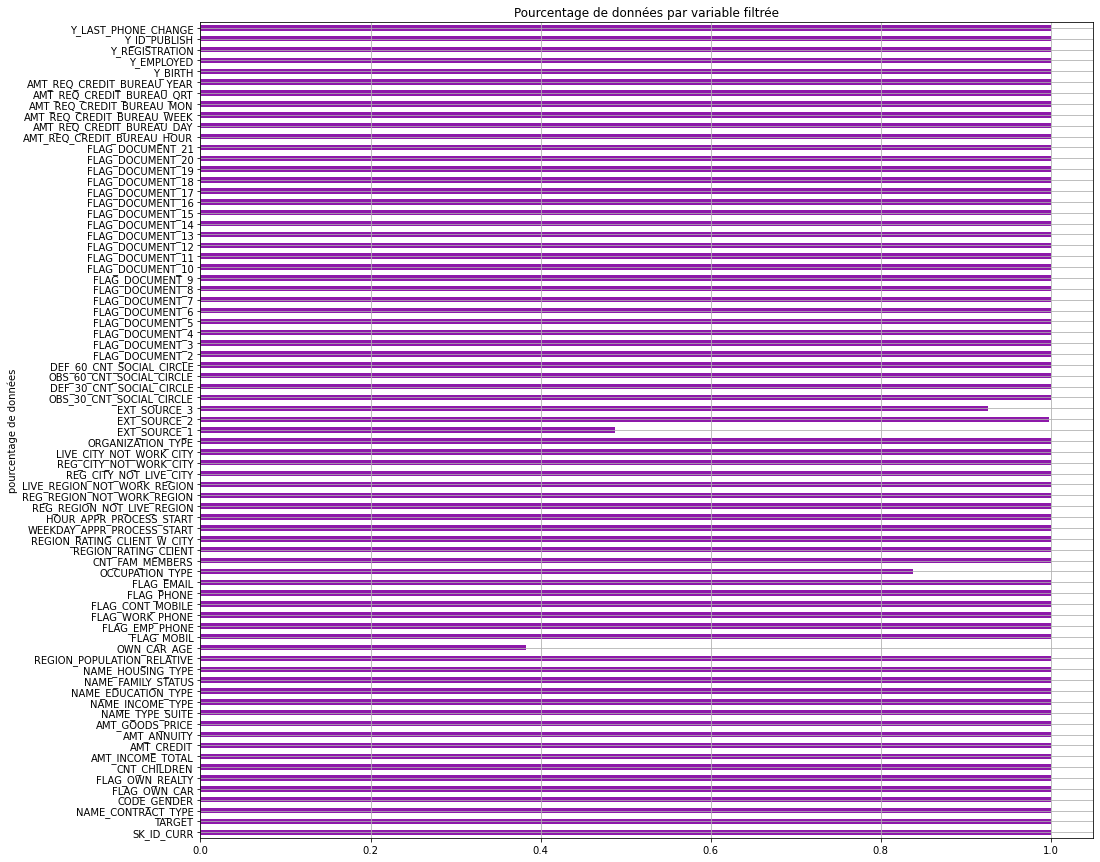

In [8]:
#cut NA
lisnum=data2.columns.to_list()
lisnocut=['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','OCCUPATION_TYPE','OWN_CAR_AGE','TARGET']
data3=data2.copy()
for i in lisnum:
    if not i in lisnocut:
        data3=data3.loc[data3[i].notnull(),:]
        
datanull=1-(data3.isnull().sum()/data3.shape[0])
plt.figure(figsize=(16,15))
ax = datanull.plot.barh( color="#8d19a9",title='Pourcentage de données par variable filtrée', xlabel='pourcentage de données')
ax.grid(zorder=0)
plt.show()

## 2) b) analyse données categorielles
* a ce stade 12 variables catégorielles
    * gender a 3 modalités , c'est une de trop, verifions les modalités
    * NAME_CONTRACT_TYPE (0/1 cash/revolving) ,CODE_GENDER (0/1 F/M),FLAG_OWN_CAR (0/1 N/Y),FLAG_OWN_REALTY (0/1 N/Y) n'ont que 2 modalités et puevent etre codées en label encoder pour devenir quantitatives 0/1
    
    * apres label encodage, il reste 8 variables categorielles qualitatives à plus de 2 modalités

* concernant les quantitatives: on a 33 booleens binaires comme TARGET et les flag
    en general les YES cont codés en 1
    * FLAG_MOBIL et FLAG_DOC_2 n'ont qu'une modalité et ne sont donc d'aucune utilité
    * Par ailleurs en dehors du FLAG_DOC_3 et 8, le 1 est tellement peu représenté dans les FLAG_DOC qu'il serait dangereux de les utiliser, REG_REGION_NOT_LIVE_REGION
    * le 0 est tellement peu représenté pour FLAG_CONT_MOBILE et FLAG_EMP_PHONE qu'il serait dangereux de les utiliser


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
dtype: int64

Cash loans         194710
Revolving loans     20962
Name: NAME_CONTRACT_TYPE, dtype: int64

F      135416
M       80252
XNA         4
Name: CODE_GENDER, dtype: int64

N    133079
Y     82593
Name: FLAG_OWN_CAR, dtype: int64

Y    146018
N     69654
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      176448
Family              27116
Spouse, partner      8149
Children             1945
Other_B              1218
Other_A               615
Group of people       181
Name: NAME_TYPE_SUITE, dtype: int64

Working                 135423
Commercial associate     60921
State servant            19302
Student                     14
Pensioner                    7
Businessman                  4
Maternity leave              1
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    147360
Higher education                  58292
Incomplete higher                  8015
Lower secondary                    1883
Academic degree                     122
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 142394
Single / not married     31840
Civil marriage           21644
Separated                13942
Widow                     5852
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      189518
With parents            11802
Municipal apartment      7747
Rented apartment         3742
Office apartment         1998
Co-op apartment           865
Name: NAME_HOUSING_TYPE, dtype: int64

Laborers                46898
NaN                     35019
Sales staff             26592
Core staff              24067
Managers                18859
                        ...  
Secretaries              1126
Waiters/barmen staff     1088
Realty agents             623
HR staff                  497
IT staff                  449
Name: OCCUPATION_TYPE, Length: 19, dtype: int64

WEDNESDAY    36899
TUESDAY      36649
FRIDAY       35402
THURSDAY     35365
MONDAY       35124
SATURDAY     24604
SUNDAY       11629
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

Business Entity Type 3    57618
Self-employed             31571
Other                     14319
Medicine                   9970
Business Entity Type 2     9353
                          ...  
Religion                     74
Trade: type 4                53
Industry: type 13            45
Trade: type 5                41
Industry: type 8             18
Name: ORGANIZATION_TYPE, Length: 57, dtype: int64

0              Cash loans
1              Cash loans
2         Revolving loans
4              Cash loans
5              Cash loans
               ...       
307502         Cash loans
307503         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 215668, dtype: object

0         0
1         0
2         1
4         0
5         0
         ..
307502    0
307503    0
307508    0
307509    0
307510    0
Name: NAME_CONTRACT_TYPE, Length: 215668, dtype: int32

NAME_CONTRACT_TYPE


0         M
1         F
2         M
4         M
5         M
         ..
307502    F
307503    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 215668, dtype: object

0         1
1         0
2         1
4         1
5         1
         ..
307502    0
307503    0
307508    0
307509    0
307510    0
Name: CODE_GENDER, Length: 215668, dtype: int32

CODE_GENDER


0         N
1         N
2         Y
4         N
5         N
         ..
307502    N
307503    N
307508    N
307509    N
307510    N
Name: FLAG_OWN_CAR, Length: 215668, dtype: object

0         0
1         0
2         1
4         0
5         0
         ..
307502    0
307503    0
307508    0
307509    0
307510    0
Name: FLAG_OWN_CAR, Length: 215668, dtype: int32

FLAG_OWN_CAR


0         Y
1         N
2         Y
4         Y
5         Y
         ..
307502    Y
307503    Y
307508    Y
307509    Y
307510    N
Name: FLAG_OWN_REALTY, Length: 215668, dtype: object

0         1
1         0
2         1
4         1
5         1
         ..
307502    1
307503    1
307508    1
307509    1
307510    0
Name: FLAG_OWN_REALTY, Length: 215668, dtype: int32

FLAG_OWN_REALTY
4 columns were label encoded.


AMT_INCOME_TOTAL                1858
AMT_CREDIT                      5009
AMT_ANNUITY                    12674
AMT_GOODS_PRICE                  754
REGION_POPULATION_RELATIVE        81
OWN_CAR_AGE                       59
CNT_FAM_MEMBERS                   17
EXT_SOURCE_1                   92318
EXT_SOURCE_2                  102125
EXT_SOURCE_3                     810
OBS_30_CNT_SOCIAL_CIRCLE          32
DEF_30_CNT_SOCIAL_CIRCLE           9
OBS_60_CNT_SOCIAL_CIRCLE          32
DEF_60_CNT_SOCIAL_CIRCLE           8
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          8
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         23
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        22
Y_BIRTH                        16399
Y_EMPLOYED                     12373
Y_REGISTRATION                 14218
Y_ID_PUBLISH                    6124
Y_LAST_PHONE_CHANGE             3718
dtype: int64

SK_ID_CURR                     215668
TARGET                              2
CNT_CHILDREN                       15
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     1
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMEN

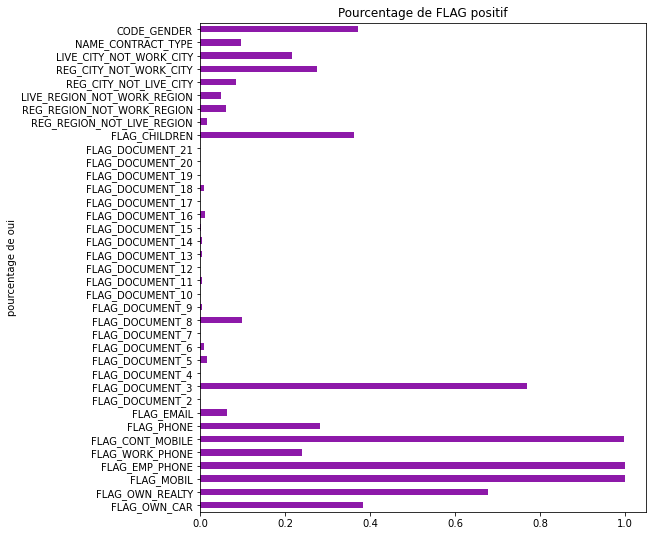

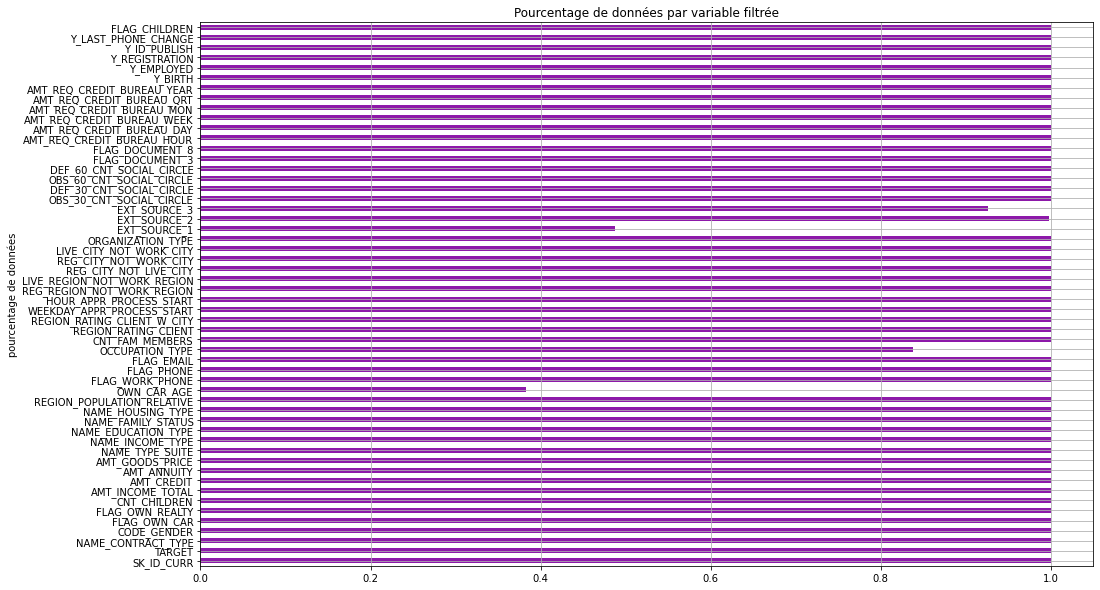

In [11]:
data4=data3.copy()

pd.set_option('max_rows', None)
display(data4.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
pd.set_option('max_rows', 10)
for i in data4.select_dtypes('object').columns.to_list():
    display(data4[i].value_counts(dropna=False))
    
data4=data4.loc[data4.CODE_GENDER != 'XNA',:]

#onehotencoder pour les categories -> 1 colonne par modalité/categorie
#mieux que labelencoder qui donne un ordre / donc uniquement pour 2 modalités

from sklearn import preprocessing
# Create a label encoder object
le = preprocessing.LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data4:
    if data4[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data4[col].unique())) <= 2:
            # Train on the training data
            le.fit(data4[col])
            display(data4[col])
            data4[col] = le.transform(data4[col])
            display(data4[col])
            # Keep track of how many columns were label encoded
            le_count += 1
            print(col)
            
print('%d columns were label encoded.' % le_count)

####################################
#on peut rajouter une variable avec ou sans enfant
data4['FLAG_CHILDREN']=data4['CNT_CHILDREN']
data4.loc[data4['CNT_CHILDREN']>=1,['FLAG_CHILDREN']]=1
#####################################
pd.set_option('max_rows', None)
display(data4.select_dtypes('float64').apply(pd.Series.nunique, axis = 0))
display(data4.select_dtypes('int64').apply(pd.Series.nunique, axis = 0))
pd.set_option('max_rows', 10)

lisflag=data4.filter(regex='^FLAG',axis=1).columns.to_list()
lispseudoflag=['REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY']
lisnewflag=['NAME_CONTRACT_TYPE','CODE_GENDER']
lisflag=lisflag+lispseudoflag+lisnewflag

dataflag=(data4[lisflag]==1).sum()/data4[lisflag].shape[0]
plt.figure(figsize=(8,9))
ax = dataflag.plot.barh( color="#8d19a9",title='Pourcentage de FLAG positif', 
                                xlabel='pourcentage de oui')

lisdrop=data4.filter(regex='^FLAG',axis=1).columns.to_list()
lisdrop=lisdrop+['REG_REGION_NOT_LIVE_REGION']
lisdrop.remove('FLAG_DOCUMENT_3')
lisdrop.remove('FLAG_DOCUMENT_8')
lisdrop.remove('FLAG_WORK_PHONE')     
lisdrop.remove('FLAG_PHONE')     
lisdrop.remove('FLAG_EMAIL')
lisdrop.remove('FLAG_OWN_CAR')
lisdrop.remove('FLAG_OWN_REALTY')
lisdrop.remove('FLAG_CHILDREN')

data4=data4.drop(columns=lisdrop)

datanull=1-(data4.isnull().sum()/data4.shape[0])
plt.figure(figsize=(16,10))
ax = datanull.plot.barh( color="#8d19a9",title='Pourcentage de données par variable filtrée', xlabel='pourcentage de données')
ax.grid(zorder=0)
plt.show()

## 2) c) analyse de la variable TARGET
### oversampling pour retablir l egalité 0/1 du train et augmenter les correlations

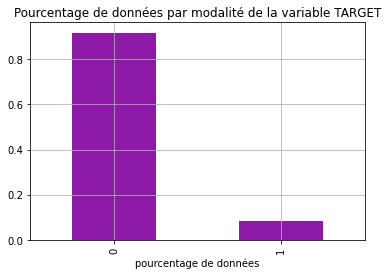

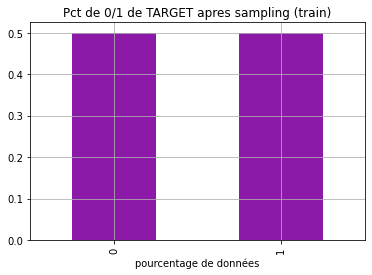

In [12]:
plt.figure(figsize=(6,4))
temp=data4.TARGET.value_counts(dropna=False)/data4.shape[0]
ax = temp.plot.bar(color="#8d19a9",title='Pourcentage de données par modalité de la variable TARGET', xlabel='pourcentage de données')
ax.grid(zorder=0)
plt.show()

#shuffling/melange
df=data4.sample(frac=1)
#undersampling ou oversampling au choix
df1=df.loc[df.TARGET==1,:]
df0=df.loc[df.TARGET==0,:]
    #cas oversampling
df1=df1.sample(n=df0.shape[0],replace=True)
    #cas undersampling
#size=df1.shape[0]
#df2=df.loc[df.TARGET==0][:size]

#fusion
df3=pd.concat([df0,df1])
#shuffling 
df3=df3.sample(frac=1)


plt.figure(figsize=(6,4))
temp=df3.TARGET.value_counts(dropna=False)/df3.shape[0]
ax = temp.plot.bar(color="#8d19a9",title='Pct de 0/1 de TARGET apres sampling (train)', xlabel='pourcentage de données')
ax.grid(zorder=0)
plt.show()

#temp=df3[lisnum].copy()
#cocorr,pvcorr,shap,dagos,cospcorr,pvspcorr=calculate_corr(temp)
#cocorr['TARGET'].sort_values()



## 2) d) ANALYSE DES RELATIONS ENTRE VARIABLES BINOMIALES ET TARGET
* contract_type: **LE REVOLVING LOANS** (1) semble faire moins de defaillants
* gender: **LES HOMMES** semblent etre un peu plus defaillants et les femmes un peu moins
* flag car: **POSSEDER UEN VOITURE** rend un poins defaillant
* home phone : donner son home phone rend un peu moins defaillant mais c est leger
* work phone : donner son work phone rend un peu plus defaillant mais c est leger
* ne pas remplir le **doc 3** rend moins defaillant: assez clair
* remplir le **doc 8** rend moins defaillant: assez clair

Chi2: 395504.0000101136 et PValue: 0.0 du test du chi2 entre TARGET et TARGET
Chi2: 1809.7798451149608 et PValue: 0.0 du test du chi2 entre TARGET et NAME_CONTRACT_TYPE
Chi2: 2661.5639216929612 et PValue: 0.0 du test du chi2 entre TARGET et CODE_GENDER
Chi2: 1337.595911666018 et PValue: 7.641731784902978e-293 du test du chi2 entre TARGET et FLAG_OWN_CAR
Chi2: 4.966058806642656 et PValue: 0.02584948466641532 du test du chi2 entre TARGET et FLAG_OWN_REALTY
Chi2: 95.73304554119338 et PValue: 1.3146758358485933e-22 du test du chi2 entre TARGET et FLAG_CHILDREN
Chi2: 375.9346837746323 et PValue: 9.551176008687765e-84 du test du chi2 entre TARGET et FLAG_WORK_PHONE
Chi2: 747.7228951918023 et PValue: 1.2546631457320705e-164 du test du chi2 entre TARGET et FLAG_PHONE
Chi2: 19.46199025980609 et PValue: 1.0262159483928638e-05 du test du chi2 entre TARGET et FLAG_EMAIL
Chi2: 2372.595443169783 et PValue: 0.0 du test du chi2 entre TARGET et FLAG_DOCUMENT_3
Chi2: 244.8311233124304 et PValue: 3.47814

C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


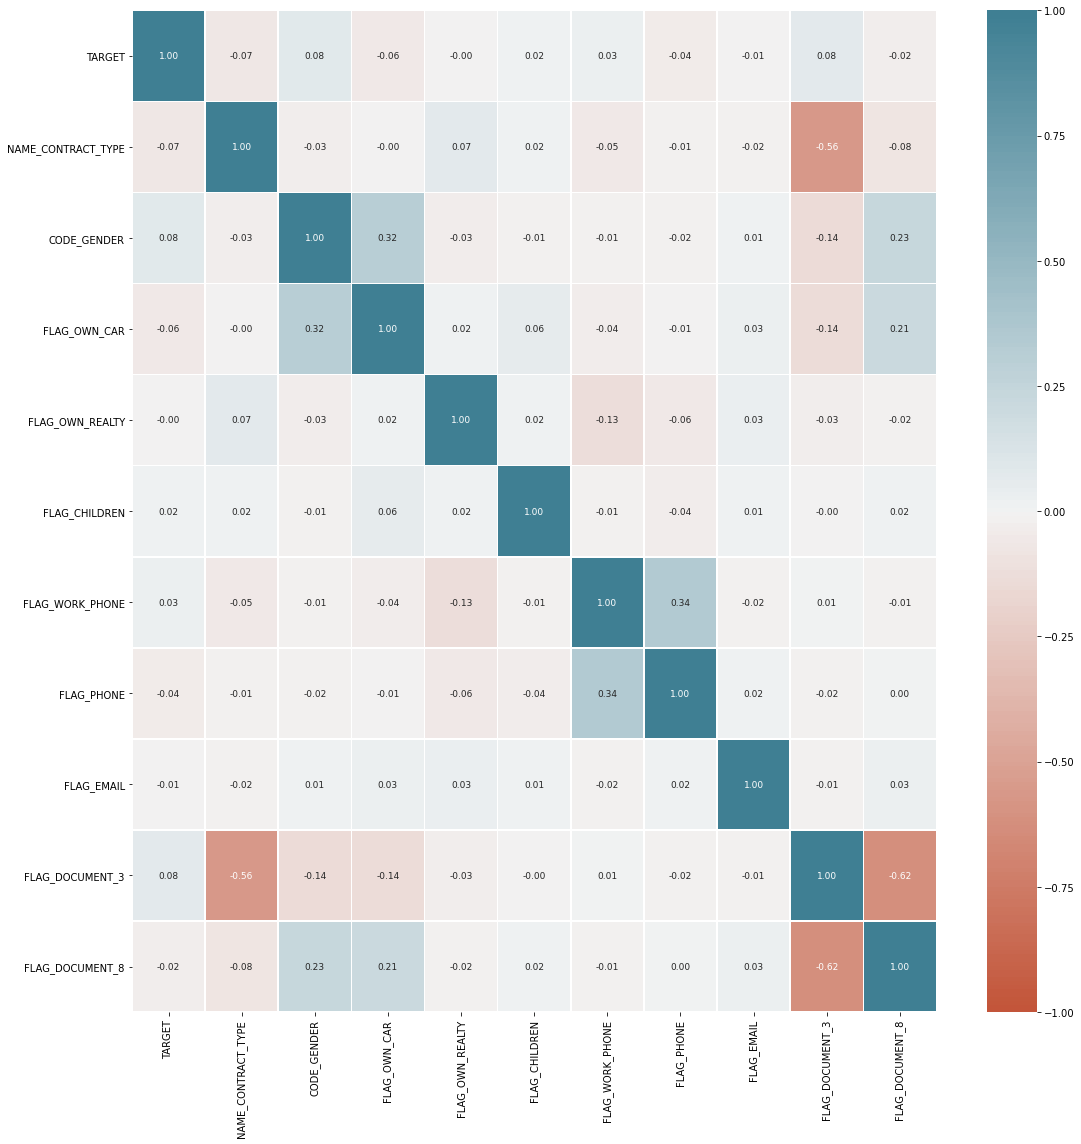

In [13]:
# Cross tabulation chi2
lisbin=['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_CHILDREN','FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8']

from scipy.stats import chi2_contingency
def chi2(df,varnam,vary):
    CrosstabResult=pd.crosstab(index=df[vary],columns=df[varnam])
    #print(CrosstabResult)
    ChiSqResult = chi2_contingency(CrosstabResult)
    print('Chi2:',ChiSqResult[0],'et PValue:',ChiSqResult[1],'du test du chi2 entre',vary,'et',varnam)
    
for i in lisbin:
    chi2(df3,i,'TARGET')
    
####################################################
from scipy.stats import pearsonr
from scipy.stats import spearmanr
#normalité
from scipy.stats import shapiro
from scipy.stats import normaltest
import seaborn as sns

def calculate_corr(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pearscoeff = dfcols.transpose().join(dfcols, how='outer')
    pearspvalues = pearscoeff.copy()
    shappvalues = pearscoeff.copy()
    normpvalues = pearscoeff.copy()
    spearcoeff = pearscoeff.copy()
    spearpvalues = pearscoeff.copy()
    for r in df.columns:
        for c in df.columns:
            pearscoeff[r][c] = round(pearsonr(df[r], df[c])[0], 4)
            pearspvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
            spearcoeff[r][c] = round(spearmanr(df[r], df[c])[0], 4)
            spearpvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
            if r==c:
                #attention pvalue shapiro wilk seulement pour N<5000
                shappvalues[r][c] = round(shapiro(df[r])[1], 4)
                #d'agostino basé sur omnibus plus adapté pour les grands echantillons
                normpvalues[r][c] = round(normaltest(df[r])[1], 4)
    pearscoeff[df.columns] = pearscoeff[df.columns].astype(float)        
    pearspvalues[df.columns] = pearspvalues[df.columns].astype(float)
    shappvalues[df.columns] = shappvalues[df.columns].astype(float)
    normpvalues[df.columns] = normpvalues[df.columns].astype(float)
    spearcoeff[df.columns] = spearcoeff[df.columns].astype(float)        
    spearpvalues[df.columns] = spearpvalues[df.columns].astype(float)
    return pearscoeff,pearspvalues,shappvalues,normpvalues,spearcoeff,spearpvalues


cocorr,pvcorr,shap,dagos,cospcorr,pvspcorr=calculate_corr(df3[lisbin])

plt.rcParams["figure.figsize"] = [16, 16]
plt.rcParams["figure.autolayout"] = True
#f, axes = plt.subplots(1, 1)

sns.heatmap(
    cocorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True,
    annot_kws={"size": 9},
    fmt='.2f',
    linewidths=.5)

plt.show()
pd.set_option('max_rows', None)
cocorr['TARGET'].sort_values()
pd.set_option('max_rows', 10)

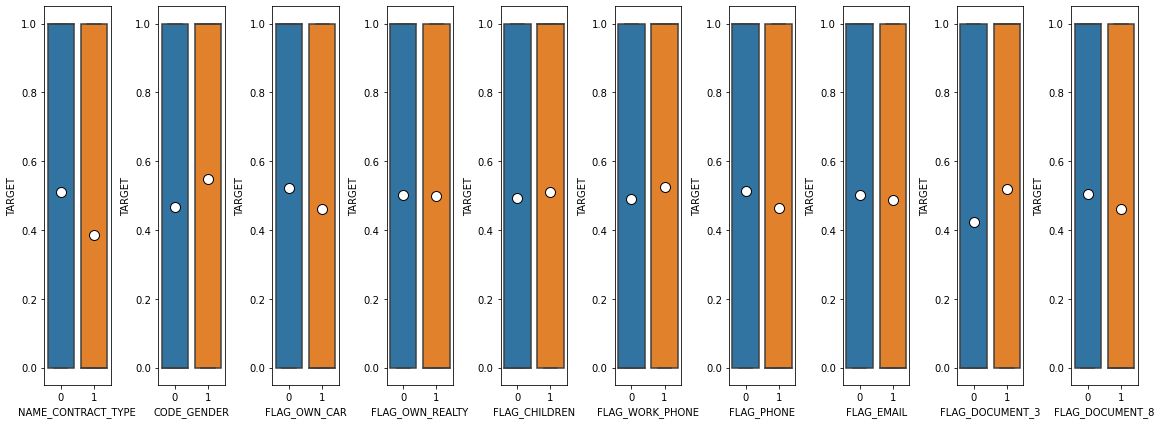

In [14]:
#variable binaire / la moyenne est importante
plt.rcParams["figure.figsize"] = [16, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 10)

sns.boxplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='CODE_GENDER', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_OWN_CAR', y='TARGET', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_OWN_REALTY', y='TARGET', data=df3,ax=axes[3],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_CHILDREN', y='TARGET', data=df3,ax=axes[4],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_WORK_PHONE', y='TARGET', data=df3,ax=axes[5],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_PHONE', y='TARGET', data=df3,ax=axes[6],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_EMAIL', y='TARGET', data=df3,ax=axes[7],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_DOCUMENT_3', y='TARGET', data=df3,ax=axes[8],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.boxplot(x='FLAG_DOCUMENT_8', y='TARGET', data=df3,ax=axes[9],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.show()
##########################################################

## 2) e) ANALYSE DES RELATIONS ENTRE VARIABLES CATEGORIELLES ET TARGET
* ANOVA pas possible car TARGET binomiale -> preferer regression logistique dans ce cas
* NAME_TYPE_SUITE : relation difficile a voir
* NAME_INCOME_TYPE : pas de prets aux retraités, etudiants et femme enceintes : mais impact sur le reste: les fonctionnaires sont moins defaillants
* NAME_EDUCATION_TYPE: le niveau d'etude a clairement un impact sur le niveau de defaillance
* NAME_FAMILY_STATUS: relation OK
* NAME_HOUSING_TYPE: relation OK
* WEEKDAY_APPR_PROCESS_START: **pas de relation**
* OCCUPATION_TYPE: relation OK mais moins renseigné
* ORGANIZATION_TYPE: relation OK
* REGION_RATING_CLIENT: relation OK -> ordonné
* REGION_RATING_CLIENT_W_CITY: : relation OK -> ordonné
* DEF_30_CNT_SOCIAL_CIRCLE : relation OK peut etre à transfo en binomiale
* DEF_60_CNT_SOCIAL_CIRCLE : relation OK peut etre à transfo en binomiale
* OBS_30_CNT_SOCIAL_CIRCLE : **peu de relation** à transfo pe 
* OBS_60_CNT_SOCIAL_CIRCLE : **peu de relation** à transfo pe

* AMT_REQ_CREDIT_BUREAU_YEAR : difficile à dire car faible representation des autres modalites
* AMT_REQ_CREDIT_BUREAU_QRT : difficile à dire car faible representation des autres modalites
* AMT_REQ_CREDIT_BUREAU_MON : difficile à dire car faible representation des autres modalites
* AMT_REQ_CREDIT_BUREAU_WEEK : difficile à dire car faible representation des autres modalites
* AMT_REQ_CREDIT_BUREAU_DAY : difficile à dire car faible representation des autres modalites
* AMT_REQ_CREDIT_BUREAU_HOUR : difficile à dire car faible representation des autres modalites


Unaccompanied      325741
Family              47794
Spouse, partner     14688
Children             3366
Other_B              2386
Other_A              1222
Group of people       311
Name: NAME_TYPE_SUITE, dtype: int64
Working                 259795
Commercial associate    105601
State servant            30086
Student                     14
Pensioner                    7
Businessman                  4
Maternity leave              1
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    286188
Higher education                  90031
Incomplete higher                 14772
Lower secondary                    4371
Academic degree                     146
Name: NAME_EDUCATION_TYPE, dtype: int64


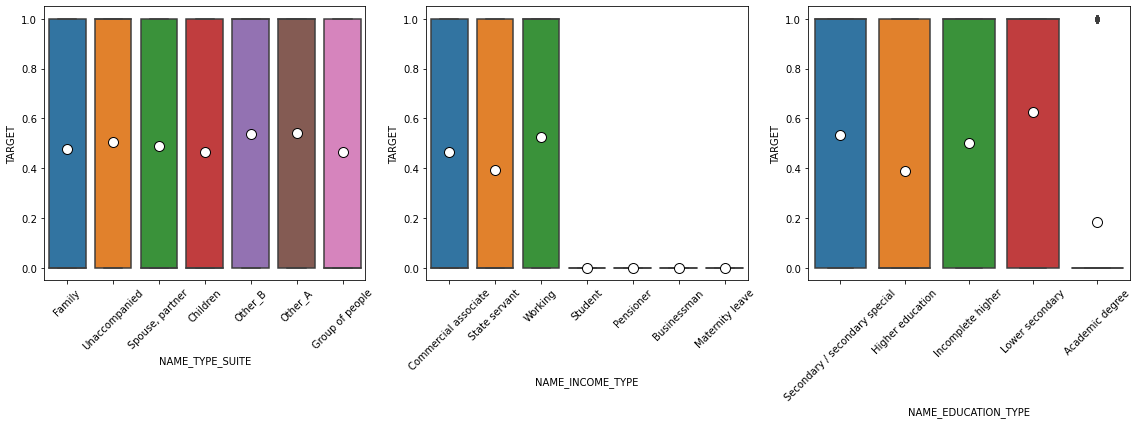

Married                 253989
Single / not married     63266
Civil marriage           43359
Separated                25700
Widow                     9194
Name: NAME_FAMILY_STATUS, dtype: int64
House / apartment      343068
With parents            25048
Municipal apartment     14388
Rented apartment         8245
Office apartment         3274
Co-op apartment          1485
Name: NAME_HOUSING_TYPE, dtype: int64
TUESDAY      67830
WEDNESDAY    67733
FRIDAY       65423
THURSDAY     65279
MONDAY       63709
SATURDAY     44442
SUNDAY       21092
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


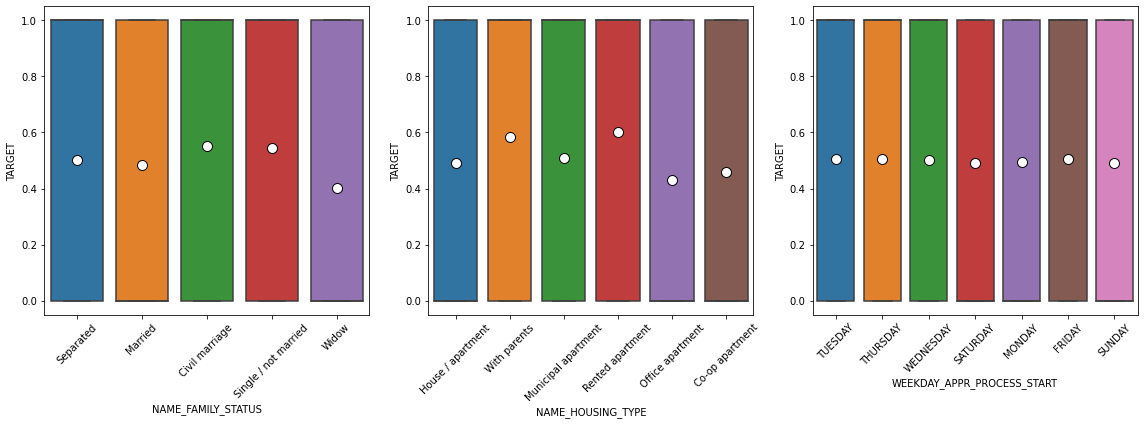

Laborers                 95006
Sales staff              51199
Core staff               38599
Drivers                  32556
Managers                 30525
High skill tech staff    15919
Medicine staff           12804
Accountants              12751
Security staff           11374
Cooking staff            10329
Cleaning staff            7437
Low-skill Laborers        4293
Private service staff     3652
Waiters/barmen staff      2282
Secretaries               1852
Realty agents             1120
HR staff                   795
IT staff                   704
Name: OCCUPATION_TYPE, dtype: int64


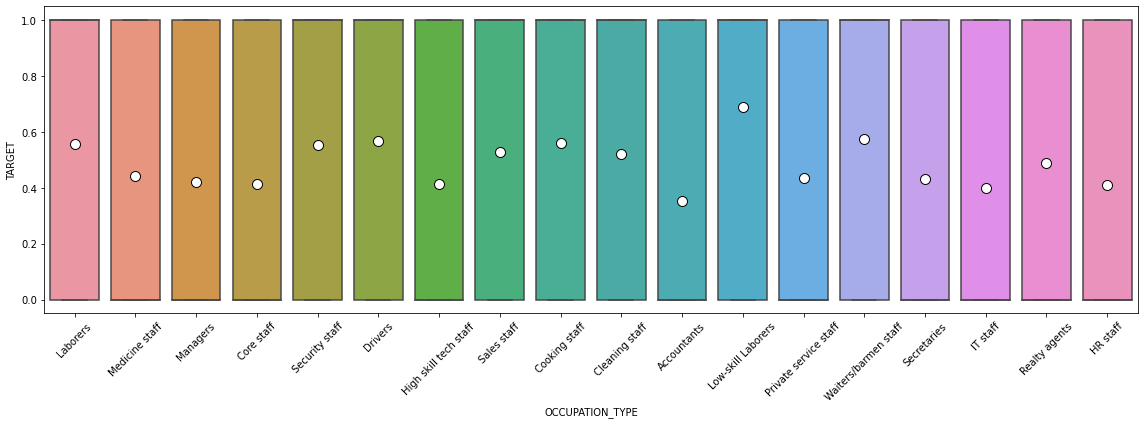

Business Entity Type 3    109335
Self-employed              62748
Other                      25241
Business Entity Type 2     17124
Medicine                   16404
Government                 15180
Trade: type 7              12361
School                     12268
Construction               11948
Kindergarten               10315
Business Entity Type 1      9457
Transport: type 4           8777
Trade: type 3               5728
Industry: type 3            5704
Security                    5445
Industry: type 9            4978
Housing                     4535
Industry: type 11           4186
Agriculture                 3839
Transport: type 2           3544
Military                    3535
Postal                      3365
Bank                        3273
Restaurant                  3266
Police                      3153
Security Ministries         2671
Trade: type 2               2539
Transport: type 3           2427
Services                    2186
Industry: type 7            2088
Industry: 

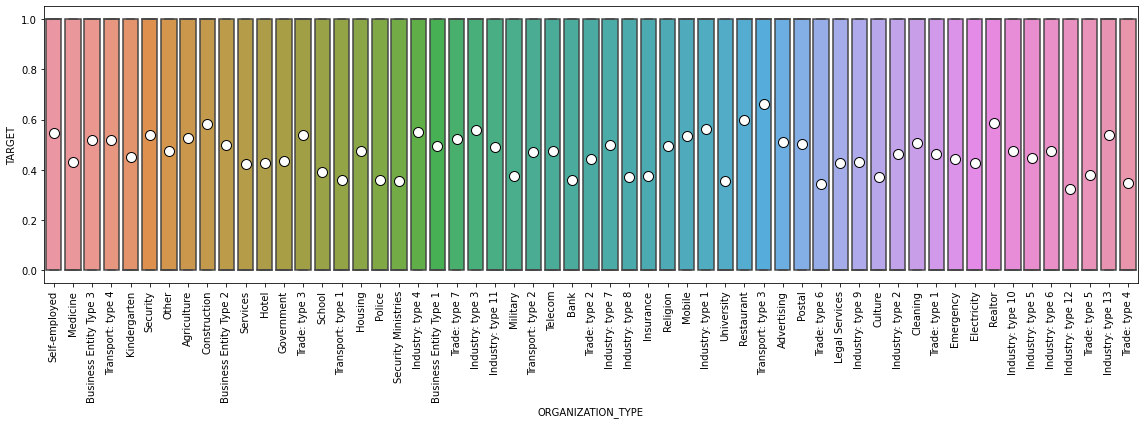

2    290290
3     70866
1     34352
Name: REGION_RATING_CLIENT, dtype: int64
2    293755
3     65187
1     36566
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


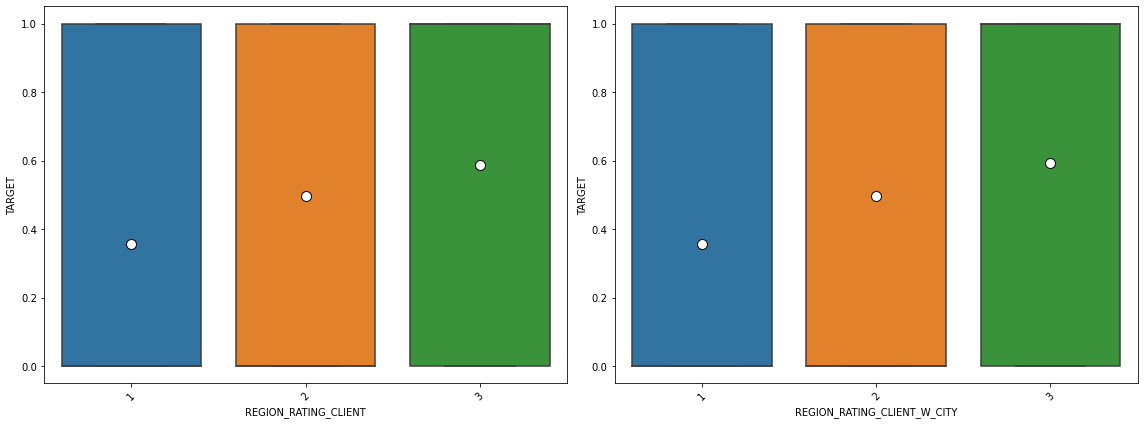

,TARGET,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
TARGET,1.000000,0.109560,0.114296
REGION_RATING_CLIENT,0.109560,1.000000,0.952755
REGION_RATING_CLIENT_W_CITY,0.114296,0.952755,1.000000


0.0     344851
1.0      40245
2.0       8040
3.0       1856
4.0        404
5.0         97
6.0         13
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
0.0     358084
1.0      31195
2.0       4992
3.0        987
4.0        204
5.0         44
6.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64


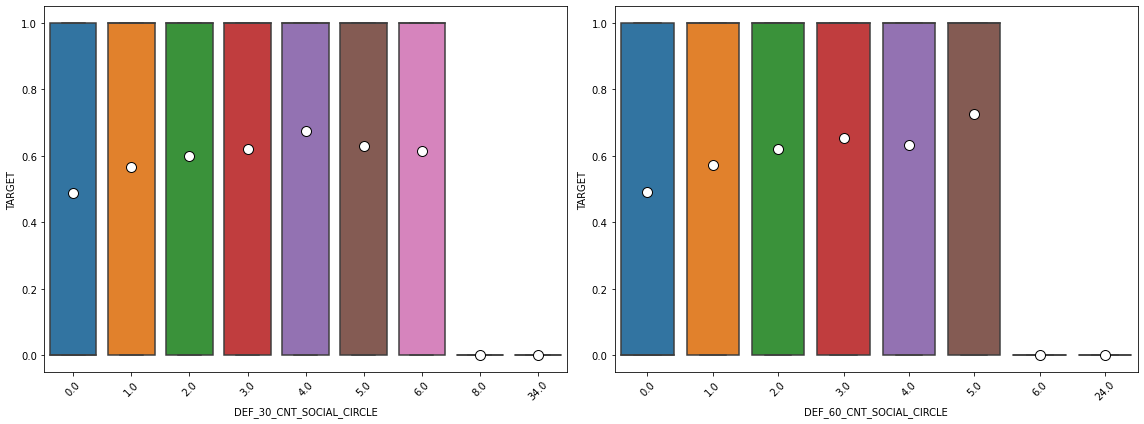

0.0      207236
1.0       63099
2.0       39324
3.0       27105
4.0       19206
          ...  
24.0          5
26.0          2
348.0         1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 32, dtype: int64
0.0      208270
1.0       63140
2.0       39244
3.0       26925
4.0       19074
          ...  
27.0          5
26.0          1
344.0         1
47.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, Length: 32, dtype: int64


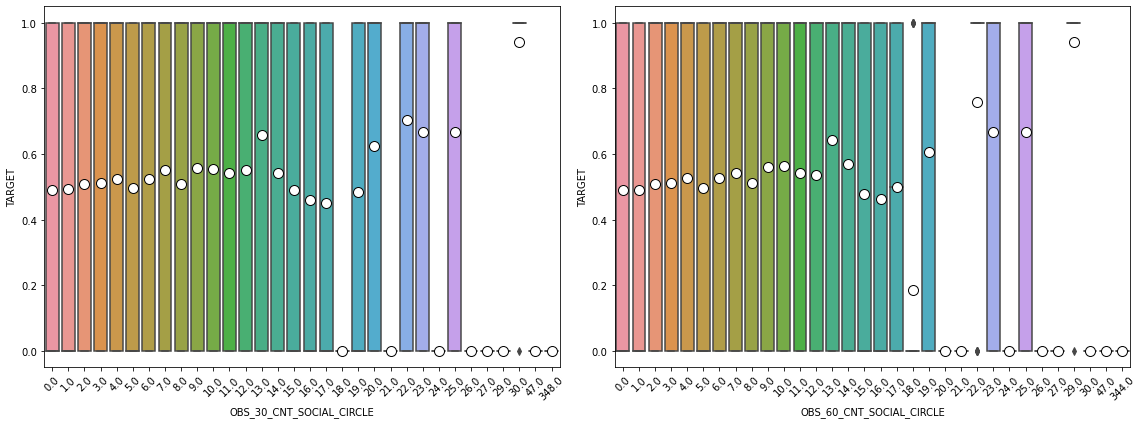

0.0    207236
1.0     63099
4.0     58744
2.0     39324
3.0     27105
Name: OBS_30_SC, dtype: int64
0.0    208270
1.0     63140
4.0     57929
2.0     39244
3.0     26925
Name: OBS_60_SC, dtype: int64


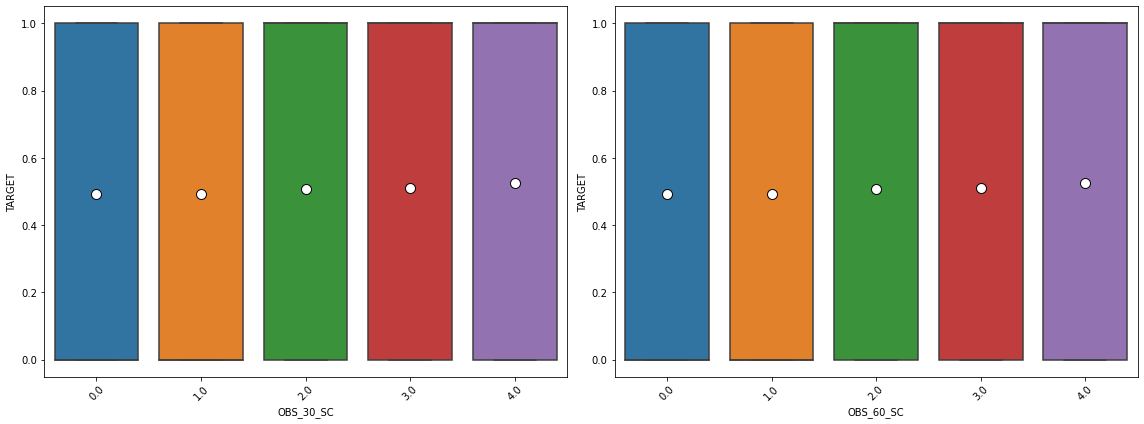

0.0     102918
1.0      94126
2.0      77482
3.0      50291
4.0      31470
         ...  
17.0         5
15.0         3
19.0         1
21.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 22, dtype: int64
0.0      323540
1.0       46768
2.0       21642
3.0        2485
4.0         841
          ...  
6.0          99
7.0          11
19.0         10
8.0           6
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 11, dtype: int64


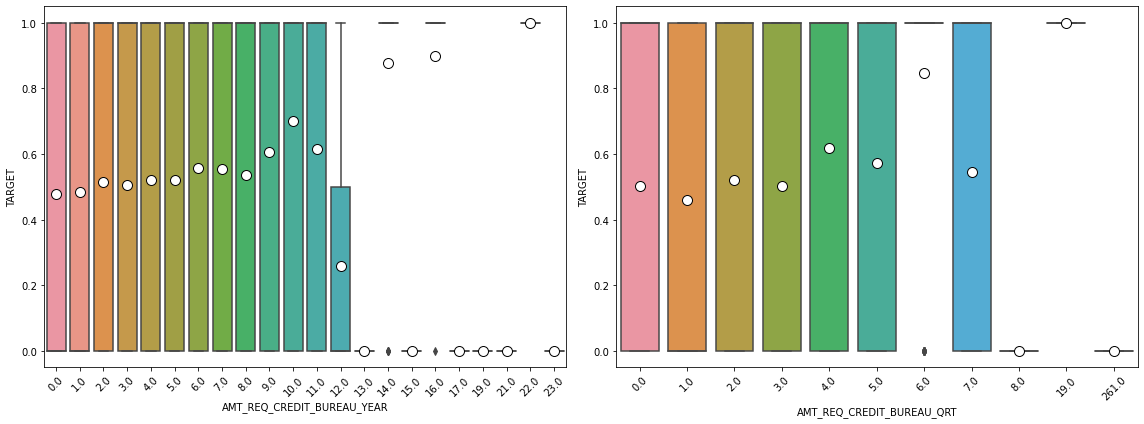

0.0     329692
1.0      50321
2.0       8295
3.0       2843
4.0       1501
         ...  
18.0         6
19.0         3
27.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, Length: 23, dtype: int64
0.0    382991
1.0     12021
2.0       321
3.0        72
4.0        53
6.0        25
5.0        21
8.0         2
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


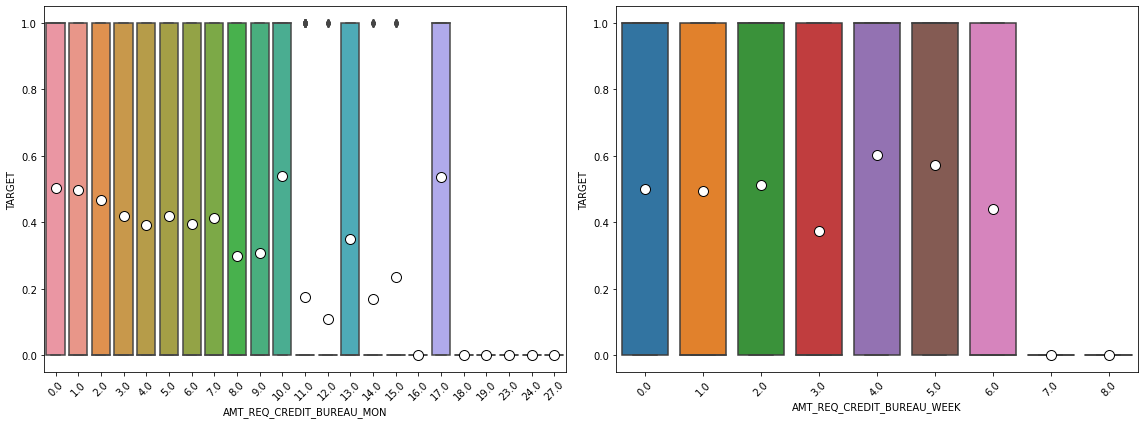

0.0    393114
1.0      2110
2.0       181
3.0        48
4.0        39
5.0         8
6.0         6
9.0         2
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    393025
1.0      2358
2.0       116
3.0         8
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


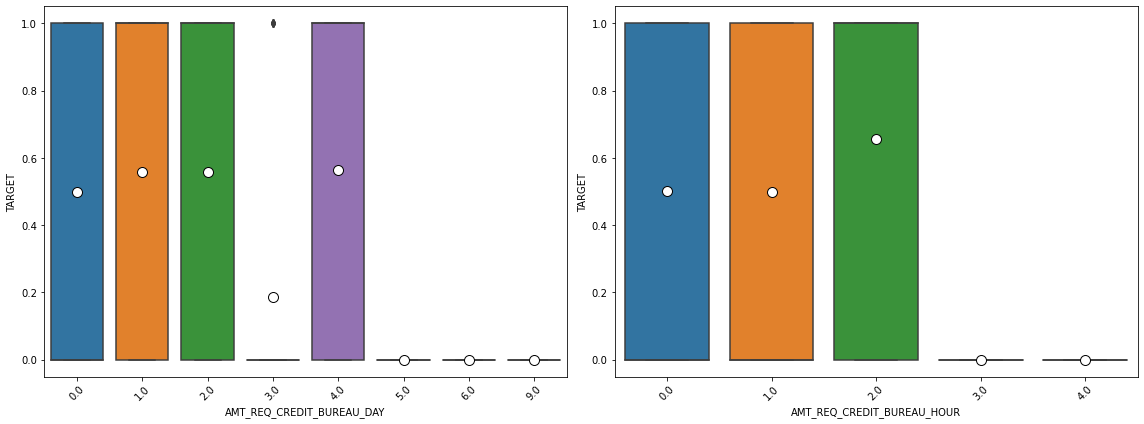

In [16]:
plt.show()
f, axes = plt.subplots(1, 3)
print(df3.NAME_TYPE_SUITE.value_counts())
sns.boxplot(x='NAME_TYPE_SUITE', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.NAME_INCOME_TYPE.value_counts())
sns.boxplot(x='NAME_INCOME_TYPE', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

print(df3.NAME_EDUCATION_TYPE.value_counts())
sns.boxplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

plt.show()
f, axes = plt.subplots(1, 3)
print(df3.NAME_FAMILY_STATUS.value_counts())
sns.boxplot(x='NAME_FAMILY_STATUS', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.NAME_HOUSING_TYPE.value_counts())
sns.boxplot(x='NAME_HOUSING_TYPE', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

print(df3.WEEKDAY_APPR_PROCESS_START.value_counts())
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START', y='TARGET', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45)

plt.show()
f, ax = plt.subplots(1, 1)
pd.set_option('max_rows', None)
print(df3.OCCUPATION_TYPE.value_counts())
pd.set_option('max_rows', 10)
sns.boxplot(x='OCCUPATION_TYPE', y='TARGET', data=df3,ax=ax,
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()
f, ax = plt.subplots(1, 1)
pd.set_option('max_rows', None)
print(df3.ORGANIZATION_TYPE.value_counts())
pd.set_option('max_rows', 10)
sns.boxplot(x='ORGANIZATION_TYPE', y='TARGET', data=df3,ax=ax,
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

f, axes = plt.subplots(1, 2)
print(df3.REGION_RATING_CLIENT.value_counts())
sns.boxplot(x='REGION_RATING_CLIENT', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.REGION_RATING_CLIENT_W_CITY.value_counts())
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

plt.show()

############################################################
display(df3[['TARGET','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].corr(method='spearman'))
############################################################

f, axes = plt.subplots(1, 2)
print(df3.DEF_30_CNT_SOCIAL_CIRCLE.value_counts())
sns.boxplot(x='DEF_30_CNT_SOCIAL_CIRCLE', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.DEF_60_CNT_SOCIAL_CIRCLE.value_counts())
sns.boxplot(x='DEF_60_CNT_SOCIAL_CIRCLE', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)

plt.show()

f, axes = plt.subplots(1, 2)
print(df3.OBS_30_CNT_SOCIAL_CIRCLE.value_counts())
sns.boxplot(x='OBS_30_CNT_SOCIAL_CIRCLE', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.OBS_60_CNT_SOCIAL_CIRCLE.value_counts())
sns.boxplot(x='OBS_60_CNT_SOCIAL_CIRCLE', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.show()
#petite transfo
df3['OBS_30_SC']=df3.OBS_30_CNT_SOCIAL_CIRCLE
df3.loc[df3.OBS_30_CNT_SOCIAL_CIRCLE>=4,['OBS_30_SC']]=4
df3['OBS_60_SC']=df3.OBS_60_CNT_SOCIAL_CIRCLE
df3.loc[df3.OBS_60_CNT_SOCIAL_CIRCLE>=4,['OBS_60_SC']]=4
f, axes = plt.subplots(1, 2)
print(df3.OBS_30_SC.value_counts())
sns.boxplot(x='OBS_30_SC', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.OBS_60_SC.value_counts())
sns.boxplot(x='OBS_60_SC', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.show()

#################################################
#REQ_CREDIT_BUREAU
f, axes = plt.subplots(1, 2)
print(df3.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts())
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_YEAR', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.AMT_REQ_CREDIT_BUREAU_QRT.value_counts())
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_QRT', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.show()

f, axes = plt.subplots(1, 2)
print(df3.AMT_REQ_CREDIT_BUREAU_MON.value_counts())
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_MON', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts())
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_WEEK', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.show()

f, axes = plt.subplots(1, 2)
print(df3.AMT_REQ_CREDIT_BUREAU_DAY.value_counts())
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_DAY', y='TARGET', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)

print(df3.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts())
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_HOUR', y='TARGET', data=df3,ax=axes[1],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.show()

## 2) f) ANALYSE DES RELATIONS ENTRE VARIABLES QUANT ET TARGET
* les scores externes apportent de la valeur
    * score faible -> defaillance
* duree d'emploi -> plus leger  mais relation
* age -> OK
    

EXT_SOURCE_3                                                    \
              count      mean       std       min       25%       50%   
TARGET                                                                  
0          183167.0  0.511194  0.191689  0.000527  0.372334  0.533482   
1          184489.0  0.384176  0.204359  0.000527  0.218859  0.370650   

                           EXT_SOURCE_1                                \
             75%       max        count      mean       std       min   
TARGET                                                                  
0       0.665855  0.893976      97162.0  0.496219  0.202655  0.014568   
1       0.544235  0.882530      87050.0  0.377696  0.196596  0.014691   

                                               EXT_SOURCE_2            \
             25%       50%       75%       max        count      mean   
TARGET                                                                  
0       0.337119  0.498214  0.657709  0.944420     197400.0  0.528999   
1       0.221195  0.356493  0.520294  0.921153     197390.0  0.418311   

                                                                   
             std       min       25%       50%       75%      max  
TARGET                                                             
0       0.183113  0.000001  0.422179  0.578414  0.669396  0.85500  
1       0.212625  0.000005  0.245532  0.449902  0.599682  0.81187

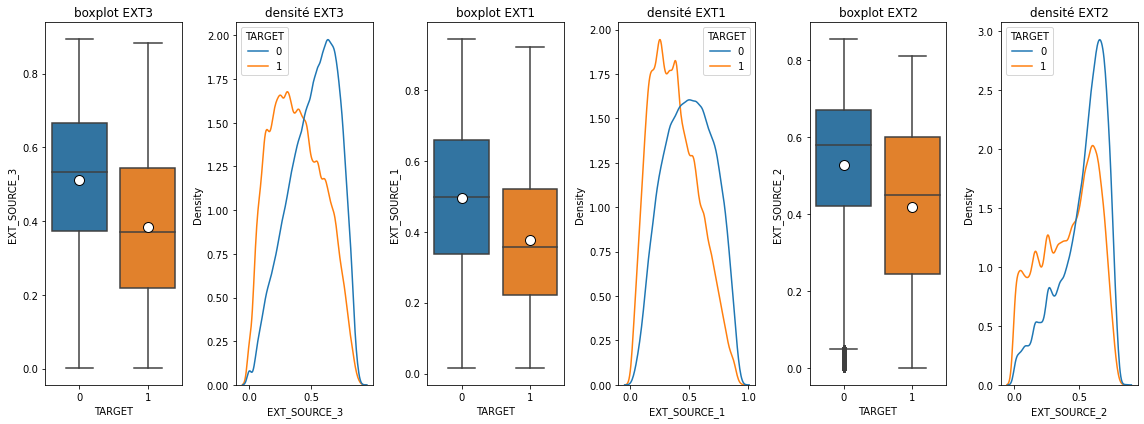

Y_EMPLOYED                                                         \
            count      mean       std  min       25%       50%       75%   
TARGET                                                                     
0        197754.0  6.864597  6.598679  0.0  2.245038  4.810404  9.180014   
1        197754.0  5.127954  5.132564  0.0  1.689254  3.504449  6.773443   

                    Y_BIRTH                                             \
              max     count       mean       std        min        25%   
TARGET                                                                   
0       49.040383  197754.0  40.946155  9.896269  20.503765  32.955510   
1       39.808350  197754.0  38.633521  9.552462  21.021218  30.841889   

                                         
              50%        75%        max  
TARGET                                   
0       40.446270  48.473648  68.993840  
1       37.667351  45.664613  68.906229

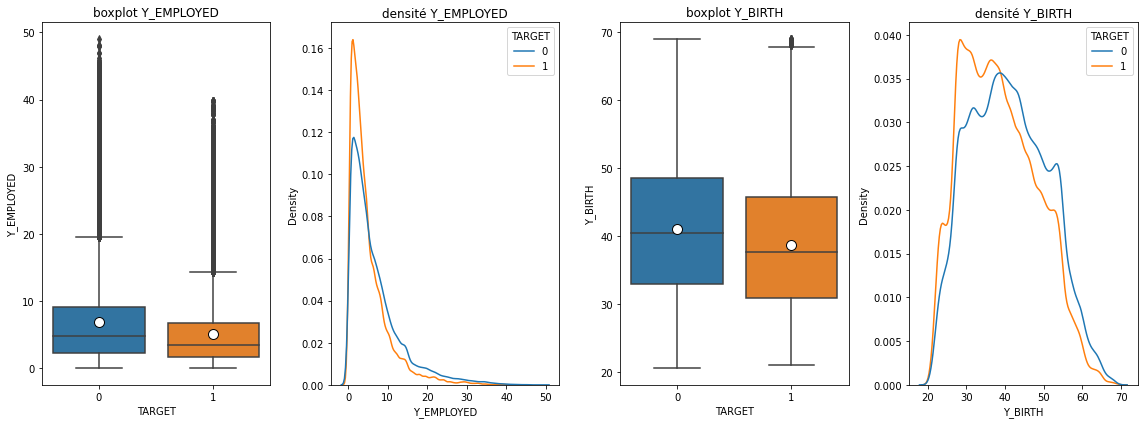

Y_LAST_PHONE_CHANGE                                               \
                     count      mean       std  min       25%       50%   
TARGET                                                                    
0                 197754.0  2.773190  2.295355 -0.0  0.845996  2.266940   
1                 197754.0  2.314457  2.095408 -0.0  0.627652  1.754962   

                            Y_ID_PUBLISH                                     \
             75%        max        count      mean       std  min       25%   
TARGET                                                                        
0       4.462697  11.457906     197754.0  7.897495  4.106936  0.0  4.413415   
1       3.734428  11.143053     197754.0  7.321968  4.093455  0.0  3.739904   

                                        
             50%        75%        max  
TARGET                                  
0       8.249144  11.559206  19.704312  
1       7.337440  11.118412  16.982888

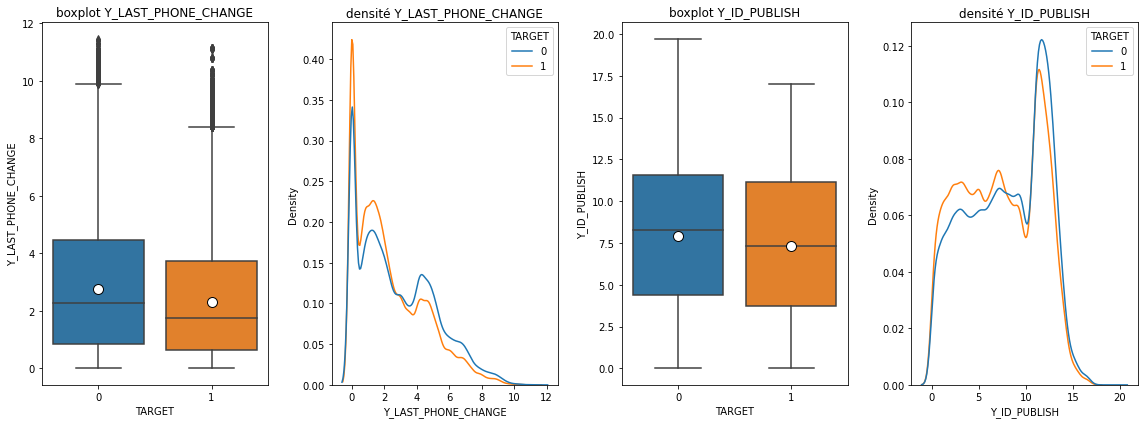

AMT_GOODS_PRICE                                                   \
                 count           mean            std      min       25%   
TARGET                                                                    
0             197754.0  562326.305652  379375.843012  40500.0  247500.0   
1             197754.0  496976.400528  310434.396348  45000.0  247500.0   

                                      AMT_CREDIT                 \
             50%       75%        max      count           mean   
TARGET                                                            
0       454500.0  720000.0  4050000.0   197754.0  624847.229505   
1       450000.0  675000.0  2700000.0   197754.0  567537.708995   

                                                                         
                  std      min       25%       50%       75%        max  
TARGET                                                                   
0       413028.487675  45000.0  284400.0  533668.5  850500.0  4050000.0  
1       346027.102318  45000.0  292500.0  508495.5  754740.0  3020760.0

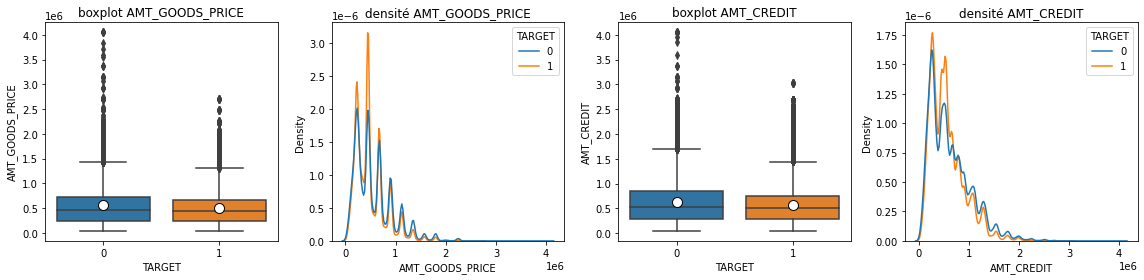

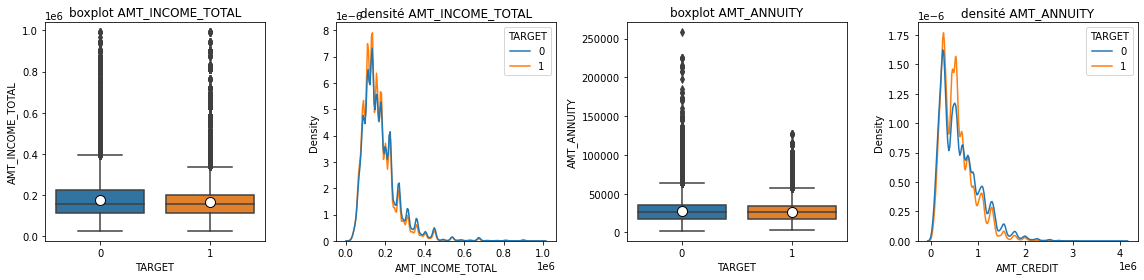

In [21]:
import seaborn as sns

#common_norm=False : permet de normaliser les densités ou non pour pouvoir les comparer
pd.set_option('max_columns', None)
########################################################################
display(df3.loc[:,['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','TARGET']].groupby('TARGET').describe()) #.unstack())

plt.rcParams["figure.figsize"] = [16, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 6)

sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='EXT_SOURCE_3', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot EXT3')
axes[1].title.set_text('densité EXT3')

sns.boxplot(x='TARGET', y='EXT_SOURCE_1', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='EXT_SOURCE_1', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot EXT1')
axes[3].title.set_text('densité EXT1')

sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=df3,ax=axes[4],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='EXT_SOURCE_2', ax=axes[5], hue="TARGET", common_norm=False)
axes[4].title.set_text('boxplot EXT2')
axes[5].title.set_text('densité EXT2')

plt.show()

display(df3.loc[:,['Y_EMPLOYED','Y_BIRTH','TARGET']].groupby('TARGET').describe()) #.unstack())

plt.rcParams["figure.figsize"] = [16, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)

sns.boxplot(x='TARGET', y='Y_EMPLOYED', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='Y_EMPLOYED', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot Y_EMPLOYED')
axes[1].title.set_text('densité Y_EMPLOYED')

sns.boxplot(x='TARGET', y='Y_BIRTH', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='Y_BIRTH', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot Y_BIRTH')
axes[3].title.set_text('densité Y_BIRTH')

plt.show()



display(df3.loc[:,['Y_LAST_PHONE_CHANGE','Y_ID_PUBLISH','TARGET']].groupby('TARGET').describe()) #.unstack())

plt.rcParams["figure.figsize"] = [16, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)

sns.boxplot(x='TARGET', y='Y_LAST_PHONE_CHANGE', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='Y_LAST_PHONE_CHANGE', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot Y_LAST_PHONE_CHANGE')
axes[1].title.set_text('densité Y_LAST_PHONE_CHANGE')

sns.boxplot(x='TARGET', y='Y_ID_PUBLISH', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='Y_ID_PUBLISH', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot Y_ID_PUBLISH')
axes[3].title.set_text('densité Y_ID_PUBLISH')

#axes[1].set_ylim([0,2*pow(10,7)])
#axes[2].set_xlim([0,1000000])


plt.show()


display(df3.loc[:,['AMT_GOODS_PRICE','AMT_CREDIT','TARGET']].groupby('TARGET').describe()) #.unstack())

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)

sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='AMT_GOODS_PRICE', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot AMT_GOODS_PRICE')
axes[1].title.set_text('densité AMT_GOODS_PRICE')

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='AMT_CREDIT', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot AMT_CREDIT')
axes[3].title.set_text('densité AMT_CREDIT')

plt.show()



#display(df3.loc[:,['AMT_INCOME_TOTAL','AMT_ANNUITY','TARGET']].groupby('TARGET').describe()) #.unstack())

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)

sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df3,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='AMT_INCOME_TOTAL', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot AMT_INCOME_TOTAL')
axes[1].title.set_text('densité AMT_INCOME_TOTAL')

sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df3,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df3, x='AMT_CREDIT', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot AMT_ANNUITY')
axes[3].title.set_text('densité AMT_ANNUITY')

plt.show()


pd.set_option('max_columns', 10)
###############################################################

# 3) NOUVEAUX FACTEURS

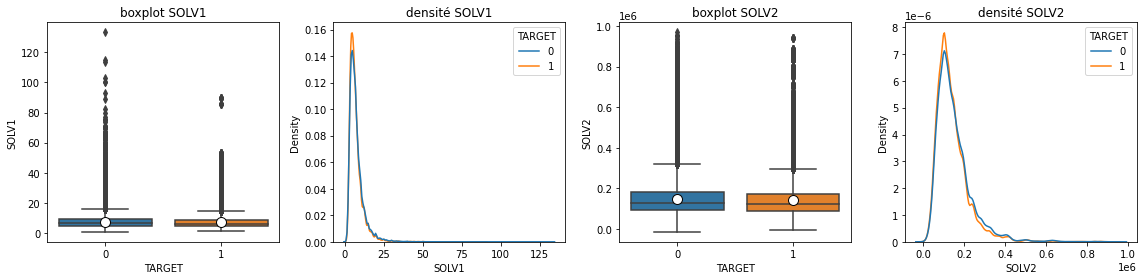

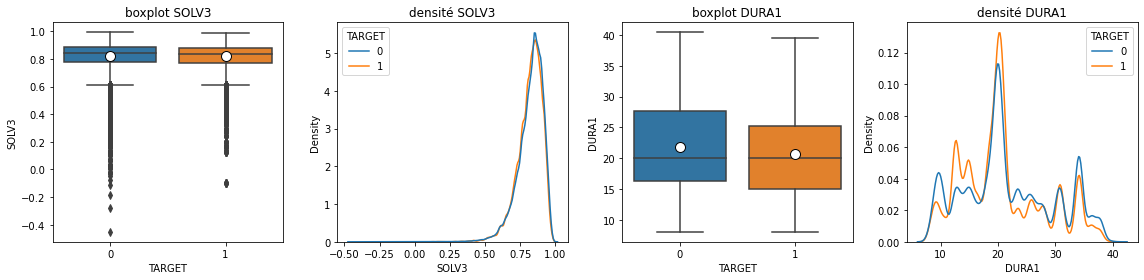

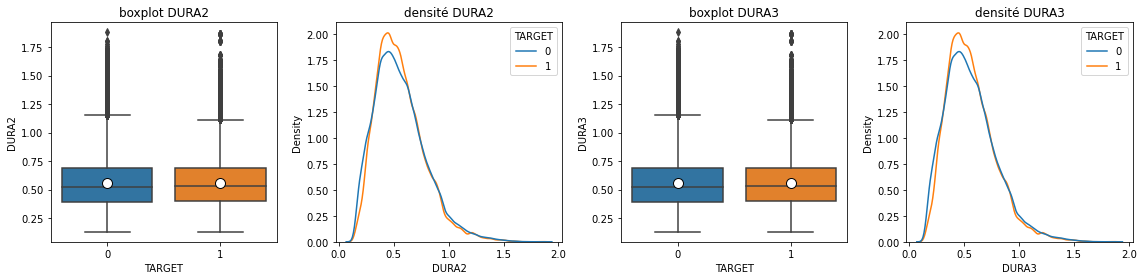

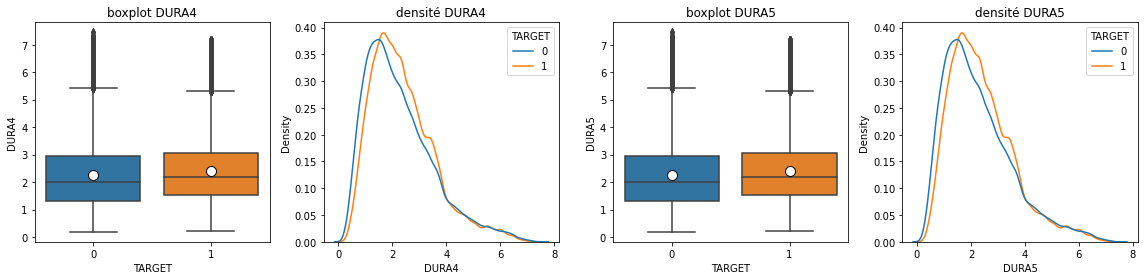

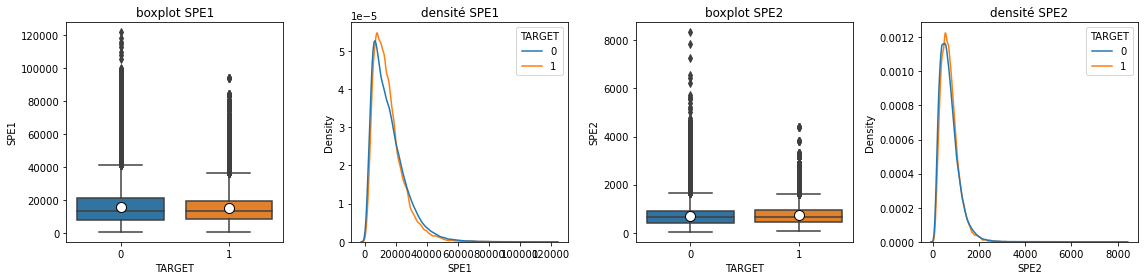

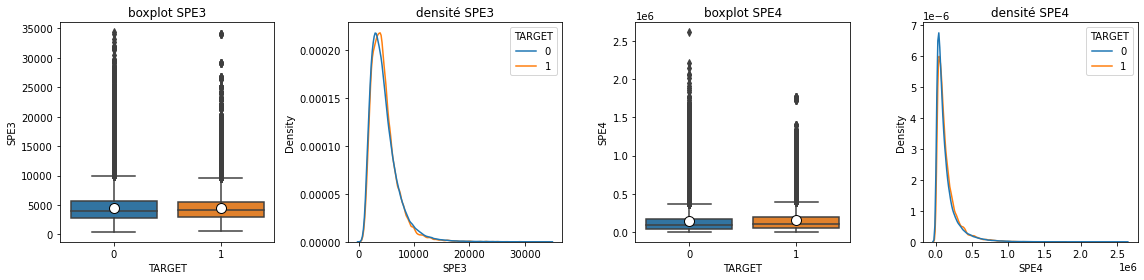

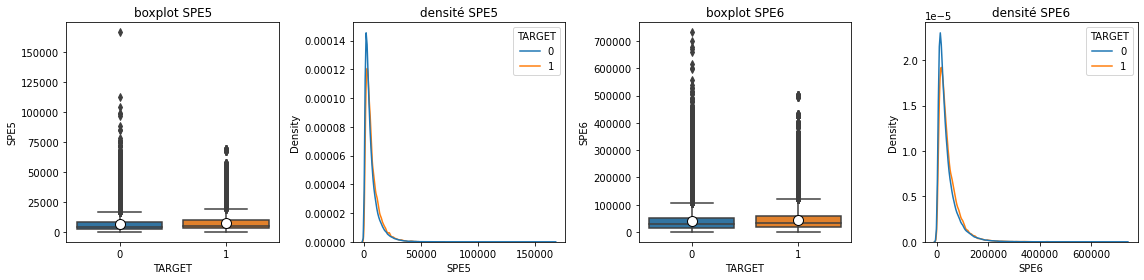

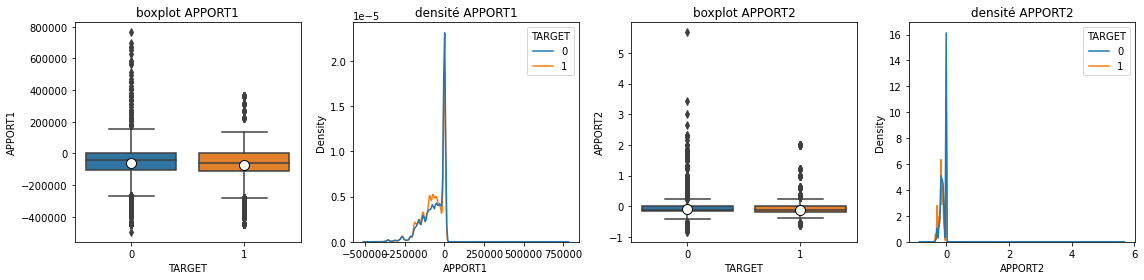

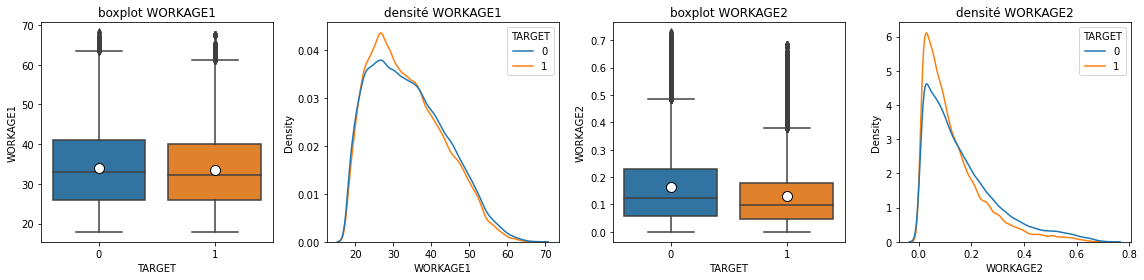

In [37]:
##############################################################
#nouveaux facteurs quant

df4=df3.copy()

df4['SOLV1']=df4['AMT_INCOME_TOTAL']/df4['AMT_ANNUITY']
df4['SOLV2']=df4['AMT_INCOME_TOTAL']-df4['AMT_ANNUITY']
df4['SOLV3']=(df4['AMT_INCOME_TOTAL']-df4['AMT_ANNUITY'])/df4['AMT_INCOME_TOTAL']

df4['DURA1']=df4['AMT_CREDIT']/df4['AMT_ANNUITY']
df4['DURA2']=(df4['AMT_CREDIT']/df4['AMT_ANNUITY'])/df4['Y_BIRTH']
df4['DURA3']=(df4['AMT_CREDIT']/df4['AMT_ANNUITY'])/df4['Y_BIRTH']
df4['DURA4']=(df4['AMT_CREDIT']/df4['AMT_ANNUITY'])/(df4['Y_EMPLOYED']+5)
df4['DURA5']=(df4['AMT_CREDIT']/df4['AMT_ANNUITY'])/(df4['Y_EMPLOYED']+5)

df4['SPE1']=df4['AMT_CREDIT']/df4['Y_BIRTH']
df4['SPE2']=df4['AMT_ANNUITY']/df4['Y_BIRTH']
df4['SPE3']=df4['AMT_INCOME_TOTAL']/df4['Y_BIRTH']

df4['SPE4']=df4['AMT_CREDIT']/(df4['Y_EMPLOYED']+1)
df4['SPE5']=df4['AMT_ANNUITY']/(df4['Y_EMPLOYED']+1)
df4['SPE6']=df4['AMT_INCOME_TOTAL']/(df4['Y_EMPLOYED']+1)
    
df4['APPORT1']=df4['AMT_GOODS_PRICE']-df4['AMT_CREDIT']
df4['APPORT2']=(df4['AMT_GOODS_PRICE']-df4['AMT_CREDIT'])/df4['AMT_CREDIT']

df4['WORKAGE1']=df4['Y_BIRTH']-df4['Y_EMPLOYED']
df4['WORKAGE2']=df4['Y_EMPLOYED']/df4['Y_BIRTH']

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='SOLV1', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SOLV1', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot SOLV1')
axes[1].title.set_text('densité SOLV1')
sns.boxplot(x='TARGET', y='SOLV2', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SOLV2', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot SOLV2')
axes[3].title.set_text('densité SOLV2')
plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='SOLV3', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SOLV3', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot SOLV3')
axes[1].title.set_text('densité SOLV3')
sns.boxplot(x='TARGET', y='DURA1', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='DURA1', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot DURA1')
axes[3].title.set_text('densité DURA1')
plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='DURA2', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='DURA2', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot DURA2')
axes[1].title.set_text('densité DURA2')
sns.boxplot(x='TARGET', y='DURA3', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='DURA3', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot DURA3')
axes[3].title.set_text('densité DURA3')
plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='DURA4', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='DURA4', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot DURA4')
axes[1].title.set_text('densité DURA4')
sns.boxplot(x='TARGET', y='DURA5', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='DURA5', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot DURA5')
axes[3].title.set_text('densité DURA5')
plt.show()



plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='SPE1', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SPE1', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot SPE1')
axes[1].title.set_text('densité SPE1')
sns.boxplot(x='TARGET', y='SPE2', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SPE2', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot SPE2')
axes[3].title.set_text('densité SPE2')
plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='SPE3', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SPE3', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot SPE3')
axes[1].title.set_text('densité SPE3')
sns.boxplot(x='TARGET', y='SPE4', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SPE4', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot SPE4')
axes[3].title.set_text('densité SPE4')
plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='SPE5', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SPE5', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot SPE5')
axes[1].title.set_text('densité SPE5')
sns.boxplot(x='TARGET', y='SPE6', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='SPE6', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot SPE6')
axes[3].title.set_text('densité SPE6')
plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='APPORT1', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='APPORT1', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot APPORT1')
axes[1].title.set_text('densité APPORT1')
sns.boxplot(x='TARGET', y='APPORT2', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='APPORT2', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot APPORT2')
axes[3].title.set_text('densité APPORT2')

plt.show()

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot(x='TARGET', y='WORKAGE1', data=df4,ax=axes[0],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='WORKAGE1', ax=axes[1], hue="TARGET", common_norm=False)
axes[0].title.set_text('boxplot WORKAGE1')
axes[1].title.set_text('densité WORKAGE1')
sns.boxplot(x='TARGET', y='WORKAGE2', data=df4,ax=axes[2],
           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
sns.kdeplot(data=df4, x='WORKAGE2', ax=axes[3], hue="TARGET", common_norm=False)
axes[2].title.set_text('boxplot WORKAGE2')
axes[3].title.set_text('densité WORKAGE2')

plt.show()


#f, axes = plt.subplots(1, 6)

#sns.boxplot(x='TARGET', y='APPORT3', data=df3,ax=axes[4],
#           showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
#sns.kdeplot(data=df3, x='APPORT3', ax=axes[5], hue="TARGET", common_norm=False)
#axes[4].title.set_text('boxplot APPORT3')
#axes[5].title.set_text('densité APPORT3')

#plt.show()